# Initial steps before looking at data: 

In [1]:
from Bio import SeqIO # SeqIO reads sequences from a file and stores them as a SeqRecord.
from Bio.Data import CodonTable 
from Bio.Seq import Seq
import pandas as pd # library used to analyze our data. 
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

## 1. Explanation of Dr. X's code: 

The explanation of the input, line by line: 
1) def is used to define a functions. We have named our function 'get_sequences_from_file'. Our argument is 'fasta_fn', for fasta function. 
2) We want the final output to go somewhere. In this case it will go to an empty ({}) dictionary called sequence_data_dict. Dictionaries hold keys and values, which allows us to give an identifier for our values (the sequence data). 
3) This is the start of a for loop, hence the "for". we are applying our get_sequences_from_file funtion to the records of whatever fasta file we apply the function to later. SeqI0 reads sequences from the file and stores it as a SeqRecord.
4) Here, we are splitting the decriptions by the individual records. 
5) Here, we are saying that the specie's name has two parts (description 1 and 2), seperated by a space. 
6) Here, we are adding an item to the dictionary. This is done by assigning a value (species_name) to a new key (record.seq). 
7) Lastly, the output is returned to sequence_data_dict - the empty dictionary. 

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

The explanation of the output: 

As requested, when the function is applied to our fasta file, penguins_cytb.fasta, we receive lines, seperated by commas, of information pertaining each record. It starts with the the species name, and is followed by the DNA sequence. 

In [3]:
our_sequences = get_sequences_from_file("penguins_cytb.fasta") # apply this function to penguins_cytb.fasta to see what they output is.
our_sequences

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

Getting a closer look at our dictionary format: 

In [4]:
for key in sorted(our_sequences.keys()):
    print(key, ' = ', our_sequences[key])

Aptenodytes forsteri  =  ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTA

Online resource used to answer #1: 
1. https://github.com/biopython/biopython/blob/master/Bio/SeqIO/QualityIO.py
2. https://eeob-biodata.github.io/BCB546X-python/02-datatypes/

## 2. Translating a string of nucleotides to amino acids: 

In [5]:
print(CodonTable.standard_dna_table) #checking out the standard codon chart. 

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

This will show you all of the different codon chart options. Penguins are vertebrates, so we want the vertebrate mitochondrial translation table: 

In [6]:
CodonTable.unambiguous_dna_by_name 

{'Standard': NCBICodonTableDNA(id=1, names=['Standard', 'SGC0'], ...),
 'SGC0': NCBICodonTableDNA(id=1, names=['Standard', 'SGC0'], ...),
 'Vertebrate Mitochondrial': NCBICodonTableDNA(id=2, names=['Vertebrate Mitochondrial', 'SGC1'], ...),
 'SGC1': NCBICodonTableDNA(id=2, names=['Vertebrate Mitochondrial', 'SGC1'], ...),
 'Yeast Mitochondrial': NCBICodonTableDNA(id=3, names=['Yeast Mitochondrial', 'SGC2'], ...),
 'SGC2': NCBICodonTableDNA(id=3, names=['Yeast Mitochondrial', 'SGC2'], ...),
 'Mold Mitochondrial': NCBICodonTableDNA(id=4, names=['Mold Mitochondrial', 'Protozoan Mitochondrial', 'Coelenterate Mitochondrial', 'Mycoplasma', 'Spiroplasma', 'SGC3'], ...),
 'Protozoan Mitochondrial': NCBICodonTableDNA(id=4, names=['Mold Mitochondrial', 'Protozoan Mitochondrial', 'Coelenterate Mitochondrial', 'Mycoplasma', 'Spiroplasma', 'SGC3'], ...),
 'Coelenterate Mitochondrial': NCBICodonTableDNA(id=4, names=['Mold Mitochondrial', 'Protozoan Mitochondrial', 'Coelenterate Mitochondrial', 'Myco

Lets check what the "Vertebrate Mitochondrial" table looks like: 

In [7]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

Next, we want to make a new function that will apply the vertebrate mitochondiral codon chart to translating our sequences to amino acids. Then, we want to make a for loop to apply it to the different records:

line 1: the function, as previously described. 

Line 2: creating an empty string for later use

Line 3: this is the correct codon chart that will be used to translate codons to aa's.

Line 4: if the length of nucleotide_string is zero when divided by 3, 

Line 5: for zero to 3 in that string (0 is 1 in Python), 

Line 6: a codon is i plus 3, for a total of 3 subquential bases.

Line 7: step for potential troubleshooting. 

Line 8: if the codon is not a stop codon (stop_codons is the list of stop codons found in the mito_table)

Line 9: getting our amino acid and adding it onto aa_seq_string. 

Line 10: where our (string) output will go. 

In [8]:
def translate_function(string_nucleotides): 
    aa_seq_string = '' 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    for i in range(0, len(string_nucleotides), 3): 
        codon = string_nucleotides[i:i +3] 
        print(codon)
        if codon not in mito_table.stop_codons: 
            aa_seq_string += mito_table.forward_table[codon] 
    return(aa_seq_string) 

Lets test it out!: 

In [9]:
translate_function(our_sequences["Eudyptes chrysocome"])

ATG
GCC
CCC
AAC
CTC
CGA
AAA
TCC
CAC
CCC
CTC
CTA
AAA
ACA
ATC
AAT
AAC
TCC
CTA
ATC
GAC
CTA
CCC
ACC
CCA
TCA
AAC
ATC
TCT
GCC
TGA
TGA
AAC
TTC
GGA
TCT
CTC
CTG
GGC
ATC
TGC
CTA
GCT
ACA
CAA
ATC
CTA
ACC
GGC
CTC
TTA
CTA
GCT
GCC
CAC
TAC
ACC
GCA
GAC
ACC
ACC
TTA
GCC
TTC
TCC
TCC
GTC
GCC
CAT
ACA
TGC
CGA
AAT
GTA
CAA
TAC
GGC
TGA
TTA
ATC
CGC
AAT
CTA
CAC
GCA
AAC
GGG
GCC
TCA
TTC
TTC
TTC
ATC
TGC
ATC
TAC
CTC
CAC
ATC
GGT
CGC
GGA
CTC
TAC
TAC
GGC
TCC
TAC
CTG
TAC
AAA
GAA
ACC
TGA
AAC
ACA
GGC
ATT
ATC
CTC
CTA
CTC
ACC
CTC
ATA
GCA
ACC
GCC
TTC
GTA
GGC
TAT
GTC
CTA
CCA
TGA
GGT
CAG
ATA
TCC
TTC
TGA
GGG
GCC
ACA
GTC
ATC
ACC
AAC
CTA
TTC
TCA
GCC
ATC
CCC
TAC
ATC
GGC
CAA
ACC
CTC
GTA
GAG
TGG
GCC
TGA
GGC
GGC
TTC
TCA
GTA
GAC
AAC
CCC
ACA
CTA
ACC
CGA
TTC
TTC
ACA
CTA
CAC
TTC
CTT
CTC
CCC
TTC
ATA
ATC
GCA
GGC
CTC
ACC
TTA
ATC
CAC
CTC
ACC
TTC
CTC
CAC
GAA
TCA
GGC
TCA
AAC
AAC
CCC
CTA
GGC
ATC
GTA
GCC
AAC
TCC
GAC
AAA
ATC
CCA
TTC
CAC
CCC
TAC
TAC
TCT
ACA
AAA
GAT
ATC
CTA
GGA
TTT
ATC
CTC
CTA
CTC
CTT
CCA
CTA
ACA
ACC
CTT
GCC
CTA
TTC
TCA
CCC
AAC
TTG


'MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFTLHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFILLLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH'

Online resource used to answer #2:
1. https://www.geeksforgeeks.org/dna-protein-python-3/
2. https://johnlekberg.com/blog/2020-09-19-dict-view.html
3. https://kodify.net/python/if-else/if-in/
4. https://eeob-biodata.github.io/BCB546X-python/02-datatypes/

## 3. Alternative function for amino acid translation: 

In [10]:
import Bio 
def alternative_function(string_nucleotides): # our function, as previously decribed. 
    aa = Bio.Seq.translate(string_nucleotides, 
                      table="Vertebrate Mitochondrial", 
                      to_stop=True, 
                      cds=True, 
                      gap=None)
    translated_codon = str(aa) #return as a string
    return(translated_codon)

The code above is using Biopython utilities to translate the codon to the appropriate amino acid. The table we are using is the appropriate table for vertebrates (our penguins). By saying to_stop=True, we are telling python to stop translating once we reach a stop codon. Additionally, cds=True makes sure that the sequence starts with an M (start codon), the sequence length is a multiple of 3, and that there is only 1 stop codon in the open reading frame. 

Testing it out: 

In [11]:
aa_seq_Eudyptes_chrysocome = alternative_function(our_sequences["Eudyptes chrysocome"])
print(aa_seq_Eudyptes_chrysocome)
type(aa_seq_Eudyptes_chrysocome)

MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFTLHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFILLLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH


str

Resources used to answer #3: 
1. https://biopython.org/docs/1.75/api/Bio.Seq.html
2. https://stackoverflow.com/questions/12037492/importerror-no-module-named-bio
3. https://eeob-biodata.github.io/BCB546X-python/02-datatypes/

## 4. Count amino acid analysis function: 

Explanation of code below: 

Here, we are defining a function that uses ProtParam analysis tools to calculate the molecular weight. ProteinAnalysis takes the string amino acid sequence and builds a sequence object. molecular_weight calculated the molecular weight of the protein. The output is returned to aa_mw.  

In [12]:
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    aa_mw = analysed_seq.molecular_weight()
    return aa_mw

In [13]:
compute_molecular_weight(aa_seq_Eudyptes_chrysocome)

42475.5753

Try it out: 

Resources used to answer #4: 
1. https://biopython.org/wiki/ProtParam

## 5. GC content analysis function: 

Explanation of the code below:

line 1: assigning a funtion

line 2: getting the total sequence length from a string of nucleotides. 

line 3, 4 and 5: Writing a for loop that looks at the bases within out string of nucleotides, and counts the number of times that 'GC' shows up within the sequence. Next, we take that number, divide by the total, and multiple that by 100 to get a percentage. 

line 6: this output is returned to GC_content. 

In [14]:
def GC_content(string_nucleotides): #function
    total = len(string_nucleotides) 
    for base in string_nucleotides:
        GC_count = string_nucleotides.count('GC')
    GC_content = (GC_count/(total))*100
    return(GC_content)

Try it out: 

In [15]:
GC_content(our_sequences["Eudyptes chrysocome"])

4.636920384951881

Resources used for question #5: 
1. https://eeob-biodata.github.io/BCB546X-python/06-biopython/
2. https://stackoverflow.com/questions/16908475/beginner-python-script-for-calculating-gc-content-in-dna-sequence

# Main

In [16]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv ("penguins_mass.txt")# Includes only data for body mass 
species_list = list(penguins_df.species)

## 6. Adding columns to the penguin data frame: 

In [17]:
import numpy as np 
penguins_df['Molecular_Weight'] = np.nan
penguins_df['GC_content'] = np.nan
print(penguins_df)

                    species   mass  Molecular_Weight  GC_content
0      Aptenodytes forsteri  28.00               NaN         NaN
1   Aptenodytes patagonicus  13.40               NaN         NaN
2       Eudyptes chrysocome   2.80               NaN         NaN
3     Eudyptes chrysolophus   4.50               NaN         NaN
4         Eudyptes sclateri   4.25               NaN         NaN
5           Eudyptula minor   1.60               NaN         NaN
6        Pygoscelis adeliae   4.60               NaN         NaN
7     Pygoscelis antarctica   4.10               NaN         NaN
8          Pygoscelis papua   6.10               NaN         NaN
9       Spheniscus demersus   3.20               NaN         NaN
10     Spheniscus humboldti   4.75               NaN         NaN
11  Spheniscus magellanicus   3.40               NaN         NaN


Resources used for question # 6: 
1. https://eeob-biodata.github.io/BCB546X-python/04-more-dataframes/

## 7. The for-loop: 

Description of the code below: 

line 1: the start of the loop. For each key value (sequence stored in each key), retrieved from the original penguins_cytb.fasta:

line 2: using the alternative fcn previusly created to translate each sequence. 

line 3: I like to print out the output in case I need to troubleshoot (again). 

line 4: using our previous GC content function to calculate GC content in our file.

line 5: .loc is used to access rows and columns by labels, whether that be to retrieve those values or replace them. We want our molecular weight and GC content values to match the species, so for each row(penguins_df.species), in the 'GC_content' column.

line 6: using the previous function made for calculating the molecular weight. For this, I had to convert aa_seq to a string in order to apply the function. 

line 6: making sure that it looks good, and that it's being done to all sequences.

line 7: same as line 5, but for molecular weight. 

In [18]:
for key, value in cytb_seqs.items():
    aa_seq = alternative_function(value)
    print(aa_seq) 
    gc = GC_content(value) #using our previous GC content function to calculate GC content in our file
    penguins_df.loc[penguins_df.species == key,'GC_content'] = gc #.loc is used to access rows and columns by labels, whether that be to retrieve those values or replace them. We want our molecular weight and GC content values to match the species, for each row(species), in the GC_content column. 
    molecular_weight = compute_molecular_weight(str(aa_seq))# using the molecular weight computing function previously described on the aa sequence
    print(molecular_weight) #in the case we need to trouble shoot.  
    penguins_df.loc[penguins_df.species == key,'Molecular_Weight'] = molecular_weight

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
42459.602100000004
MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
42563.70669999999
MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFTLHFLLPFMIAGLTLIHLTFL

In [19]:
print(penguins_df) #check the dataframe. 

                    species   mass  Molecular_Weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021    4.636920
1   Aptenodytes patagonicus  13.40        42563.7067    4.374453
2       Eudyptes chrysocome   2.80        42475.5753    4.636920
3     Eudyptes chrysolophus   4.50        42445.5493    4.724409
4         Eudyptes sclateri   4.25        42475.5753    4.461942
5           Eudyptula minor   1.60        42491.6408    4.461942
6        Pygoscelis adeliae   4.60        42458.6140    4.549431
7     Pygoscelis antarctica   4.10        42404.5423    3.849519
8          Pygoscelis papua   6.10        42595.8759    4.286964
9       Spheniscus demersus   3.20        42431.5490    4.724409
10     Spheniscus humboldti   4.75        42399.5520    4.636920
11  Spheniscus magellanicus   3.40        42459.6021    4.636920


Resources used to answer #7: 
1. https://eeob-biodata.github.io/BCB546X-python/02-datatypes/
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

## 8. bar-chart of the mass with the x-axes labeled with species names:

Explanation of the code below: 
Here, we are using seaborn barplot functions to plot the relationship between species and mass. We rotated the x labels 90 degrees in order to properly see the species names.

To answer the questions: 

What is the smallest penguin species? 
The penguin with the smallest mass is Eudyptula minor. 

What is the geographical range of this species?
The geographical range of Eudyptula minor is southern Australia and New Zealand. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Aptenodytes forsteri'),
  Text(1, 0, 'Aptenodytes patagonicus'),
  Text(2, 0, 'Eudyptes chrysocome'),
  Text(3, 0, 'Eudyptes chrysolophus'),
  Text(4, 0, 'Eudyptes sclateri'),
  Text(5, 0, 'Eudyptula minor'),
  Text(6, 0, 'Pygoscelis adeliae'),
  Text(7, 0, 'Pygoscelis antarctica'),
  Text(8, 0, 'Pygoscelis papua'),
  Text(9, 0, 'Spheniscus demersus'),
  Text(10, 0, 'Spheniscus humboldti'),
  Text(11, 0, 'Spheniscus magellanicus')])

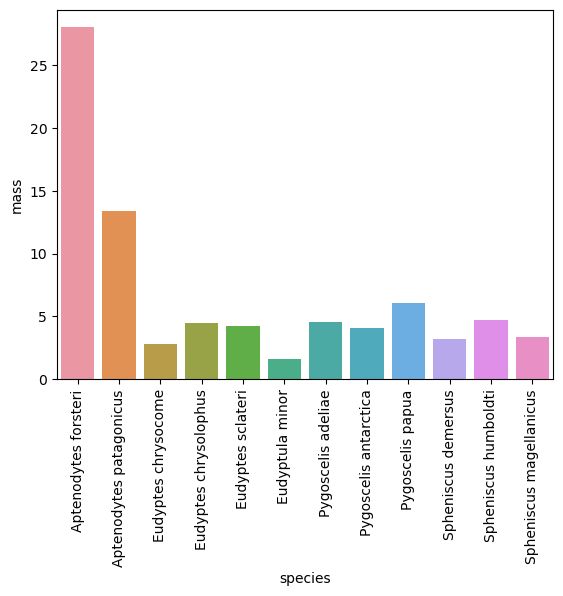

In [20]:
sns.barplot(x = 'species',
            y = 'mass',
            data = penguins_df)
plt.xticks(rotation=90)

Resources for answering question #8:
1. https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
2. https://stackoverflow.com/questions/33227473/how-to-set-the-range-of-y-axis-for-a-seaborn-boxplot

Penguin facts: 
1. https://www.aquariumofpacific.org/onlinelearningcenter/species/little_blue_penguin

## 9. visualization of the molecular weight (y-axis) as a function of GC-content (x-axis): 

I prefer scatterplots to show a functional relationship between 2 quantitative variables. 
There is no obvious functional relationship between molecular weight and GC content. 

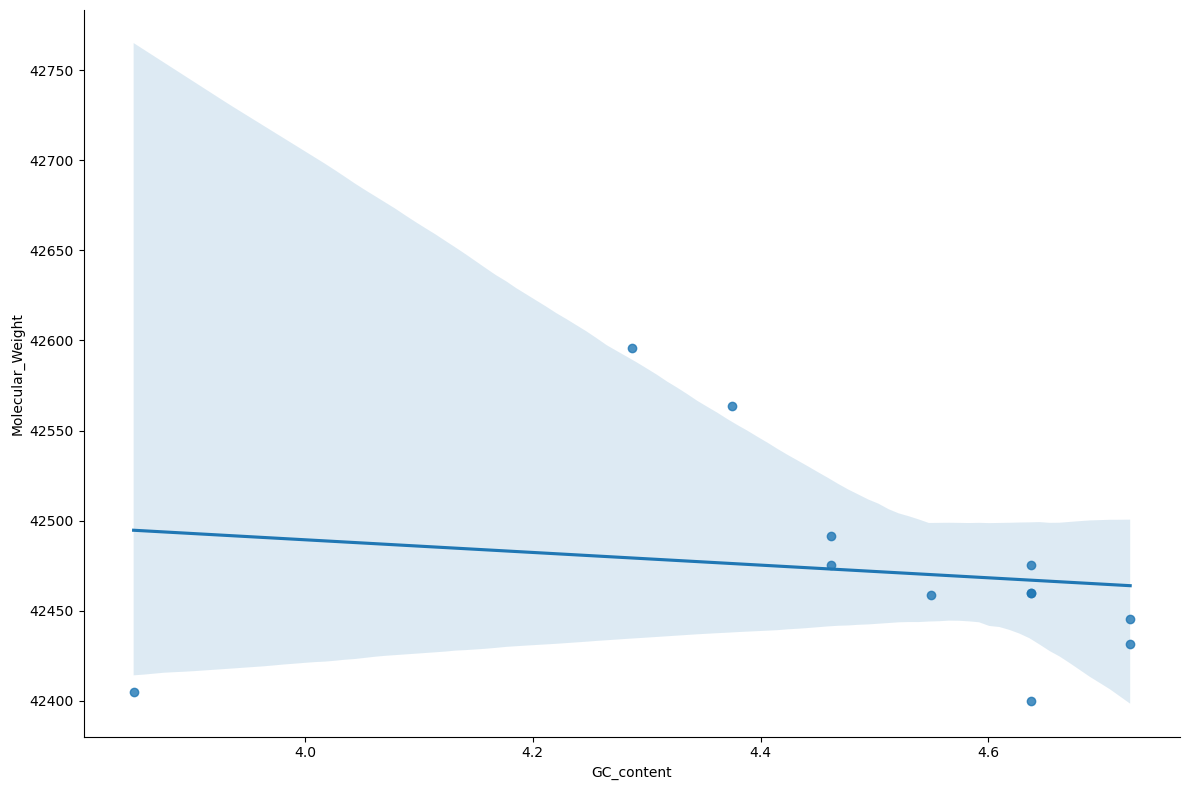

In [21]:
sns.lmplot(x="GC_content", y="Molecular_Weight", data=penguins_df, fit_reg=True, height=8, aspect=1.5)

Resources used for question #9: 
1. https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/

## 10. Save the new DataFrame to a file called "penguins_mass_cytb.csv":

In [22]:
penguins_df.to_csv('penguins_mass_cytb.csv')

Resources used for question #10: 
1. https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03

## 11. Potential bonus: 

The code below allows us to see all the possible relantions between all numeric variables in our dataset. It is all relatively low - but further tests would need to be ran in order to reach a conclusion. 

/var/folders/c3/1dxj22vn169_4rm4jy5r6l7m0000gn/T/ipykernel_68722/3518966292.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(penguins_df.corr(), xticklabels=penguins_df.corr().columns, yticklabels=penguins_df.corr().columns, cmap='RdYlGn', center=0, annot=True)


<Axes: >

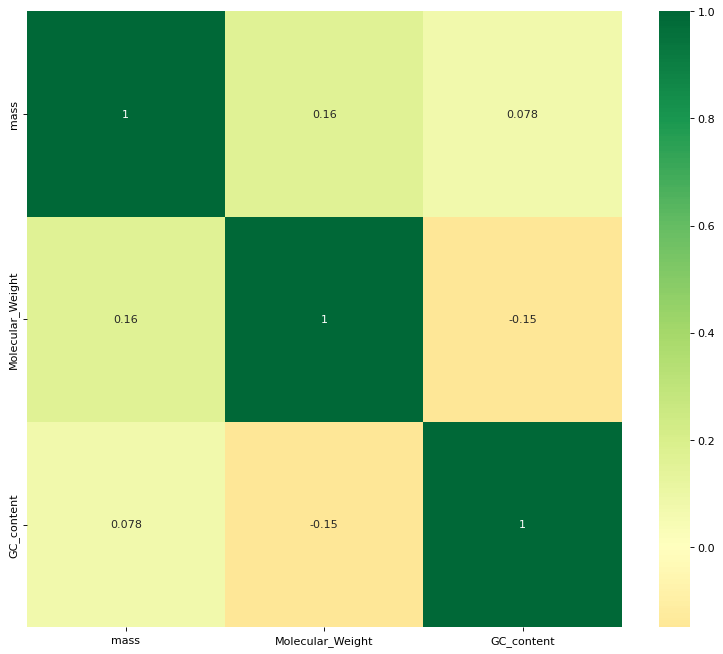

In [23]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(penguins_df.corr(), xticklabels=penguins_df.corr().columns, yticklabels=penguins_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

Resource used for graph: 
1. https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/